In [1]:
!rm -rf EVA-4
!git clone https://github.com/seepala98/EVA-4.git
!cp EVA-4/PHASE_1/S8/*.py .

Cloning into 'EVA-4'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 212 (delta 71), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (212/212), 902.76 KiB | 1.19 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [2]:
%ls

data/       load_transform.py  __pycache__/  train.py
display.py  model.py           resnet.py     validation.py
EVA-4/      plot.py            sample_data/


# Import Library

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [4]:
import load_transform
# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


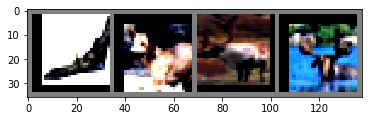

In [5]:
import display
# get some random training images
dataiter = iter(load_transform.trainloader_for_plot)
images, labels = dataiter.next()

# show images
display.imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

In [0]:
import resnet

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
model = resnet.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14      

# Loss Function and optimization

In [0]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)

# train and test

In [0]:
import train 
import validation

In [0]:
losses = []
accuracies = []

epochs = 30
for epoch in range(1, epochs + 1):
    print(f'Epoch {epoch}:')
    train.train(model, load_transform.train_loader, device, optimizer, criterion)
    validation.val(model, load_transform.val_loader, device, criterion, losses, accuracies)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1:


Loss=1.40 Batch ID=283 Accuracy=39.57:  73%|███████▎  | 284/391 [02:22<00:53,  2.01it/s]

# Plot Result

In [0]:
%matplotlib inline
import plot

In [0]:
plot.plot_metric(losses, 'Loss')

# Plot Accuracy

In [0]:
plot.plot_metric(accuracies, 'Accuracy')

In [0]:
dataiter = iter(load_transform.testloader_for_plot)
images, labels = dataiter.next()

display.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = model(images.cuda())

In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

# Result Analysis


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for _, (images, labels) in enumerate(load_transform.val_loader, 0):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))